In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [3]:
from langgraph.graph.message import add_messages
from numpy import add

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]


In [4]:
model = ChatOpenAI()

In [5]:
def chat_node(state: ChatState):

    messages = state['messages']

    response = model.invoke(messages)

    return {'messages': [response]}

In [6]:
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

checkpointer = MemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

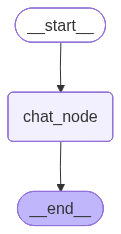

In [7]:
workflow

In [9]:
from email import message


thread_id = '1'

while True:

    user_message = input('Type here: ')

    print('User:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye' ]:
        break

    config = {"configurable" : {"thread_id" : thread_id}}

    response = workflow.invoke({'messages' : [HumanMessage(content=user_message)]}, config=config)

    print('Bot:', response['messages'][-1].content)


User: Hi
Bot: Hello! How can I assist you today?
User: My name is Vedaant
Bot: Nice to meet you, Vedaant! How can I help you today?
User: What is my Name ?
Bot: Your name is Vedaant. How can I assist you today, Vedaant?
User: exit
